In [ ]:
import numpy as np # линейная алгебра
import pandas as pd # обработка данных, ввод-вывод CSV-файла

import matplotlib.pyplot as plt # базовые визуализации
import seaborn as sns # расширенные визуализации

import statsmodels.api as sm

import random
random.seed(42) #Мы устанавливаем начальное значение, чтобы гарантировать, что вы получите одинаковые ответы.

import warnings
warnings.filterwarnings('ignore')

from scipy.stats import kstest

In [ ]:
df = pd.read_csv("/content/результаты А_B - cookie_cats 2.csv")
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,0,0
1,337,gate_30,38,1,0
2,377,gate_40,165,1,0
3,483,gate_40,1,0,0
4,488,gate_40,179,1,1


In [ ]:
# количество строк и уникальных пользователей
print(f'Количество строк: {df.shape[0]}')
print(f'Количество уникальных пользователей: {df.userid.nunique()}')

Количество строк: 90189
Количество уникальных пользователей: 90189


In [ ]:
df[['sum_gamerounds', 'retention_1', 'retention_7']].describe()

,sum_gamerounds,retention_1,retention_7
count,90189.000000,90189.000000,90189.000000
mean,51.872457,0.445210,0.186065
std,195.050858,0.496992,0.389161
min,0.000000,0.000000,0.000000
25%,5.000000,0.000000,0.000000
50%,16.000000,0.000000,0.000000
75%,51.000000,1.000000,0.000000
max,49854.000000,1.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  int64 
 4   retention_7     90189 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 3.4+ MB


In [ ]:
# пропущенные значения
df.isna().sum()

userid            0
version           0
sum_gamerounds    0
retention_1       0
retention_7       0
dtype: int64

In [ ]:
# Проверка на полные дубли.
df.duplicated().sum()

0

In [ ]:
# Подсчет количества игроков в каждой группе A/B.
df.groupby("version")[["userid"]].nunique()

,userid
version,
gate_30,44700
gate_40,45489


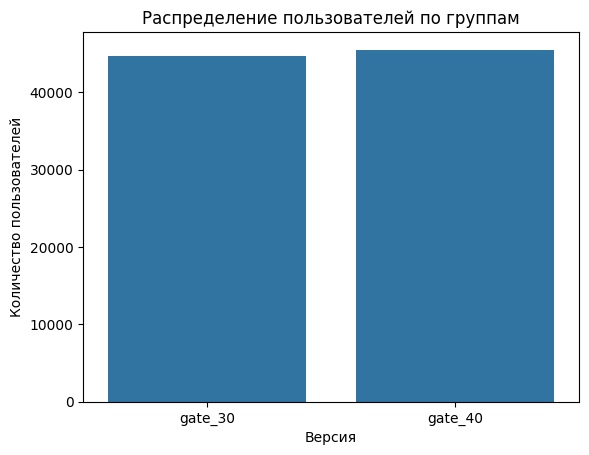

In [ ]:
sns.countplot(x='version',data = df)
plt.title('Распределение пользователей по группам')
plt.xlabel('Версия')
plt.ylabel('Количество пользователей')
plt.show()

<Axes: xlabel='version', ylabel='sum_gamerounds'>

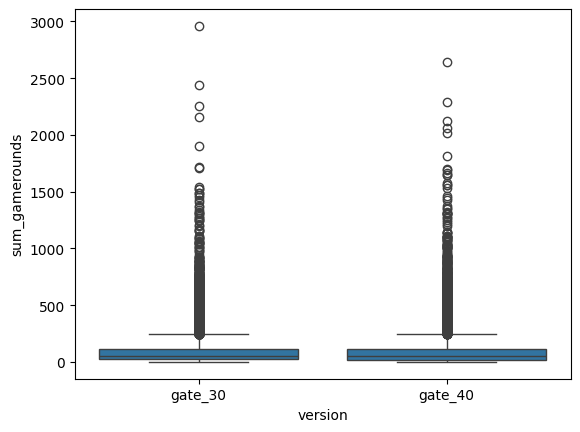

In [ ]:
sns.boxplot(data = df[df['retention_1'] == 1], y = 'sum_gamerounds', x = 'version')

По графикам видно, что распределения в обоих группах ненормальные, есть выбросы.

In [ ]:
# Проверка нормальности данных по критерию Колмогорова-Смирнова

kstest(df['sum_gamerounds'], 'norm')

KstestResult(statistic=0.8715607041848303, pvalue=0.0, statistic_location=2, statistic_sign=-1)

### Вывод: данные не следуют нормальному распределению

In [ ]:
# Применение критерия Манна-Уитни

ab_test = df.groupby('version')['sum_gamerounds'].sum()
mannwhitneyu_stat, mannwhitneyu_p = mannwhitneyu(ab_test['gate_30'], ab_test['gate_40'])
print('Statistic:', mannwhitneyu_stat)
print('P-value:', mannwhitneyu_p)

Statistic: 1.0
P-value: 1.0


### Вывод: статистически значимых различий между двумя выборками нет.

In [ ]:
# Расчет эффективности выборок
retention_1_mean = df.groupby('version')['retention_1'].mean()
print('Средний коэффициент удержания через 1 день:')
print(retention_1_mean)

Средний коэффициент удержания через 1 день:
version
gate_30    0.448188
gate_40    0.442283
Name: retention_1, dtype: float64


### С учетом средних коэффициентов удержания через 1 день, можно заметить, что для обеих групп уровень удержания примерно одинаковый: **0.448188 для gate30 и 0.442283 для gate40.** Различие между этими значениями не так велико, что может указывать на схожую эффективность удержания пользователей в первый день после установки.

In [ ]:
retention_7_mean = df.groupby('version')['retention_7'].mean()
print('Средний уровень удержания через 7 дней:')
print(retention_7_mean)

Средний уровень удержания через 7 дней:
version
gate_30    0.190201
gate_40    0.182000
Name: retention_7, dtype: float64


### С учетом средних уровней удержания через 7 дней, видно, что у **gate30 - 0.190201**, средний уровень удержания немного выше, чем у **gate40 - 0.182000**. Это означает, что пользователи, установившие gate30, с большей вероятностью остаются в приложении на 7-й день по сравнению с пользователями, установившими gate40.

## Таким образом, можно предположить, что gate30 может быть более эффективным в удержании пользователей через 7 дней, чем gate40, несмотря на схожий коэффициент удержания в первый день.

### Рекомендации менеджеру
1. Изучить долгосрочные эффекты каждой группы, чтобы определить, какой вариант обеспечивает более стабильное удержание.
2. Провести тестирование новых подходов к удержанию пользователей для каждой группы и сравнить их эффективность.
3. Мониторить результаты и собирать обратную связь пользователей для определения необходимых изменений в стратегии удержания.